# Clustering for anchor box

In [84]:
%matplotlib inline

In [85]:
import pandas as pd
from PIL import Image
import json
import numpy as np
from matplotlib import pyplot as plt

In [26]:
x = json.loads('{"name" : 2}')

In [27]:
x['name']

2

In [2]:
annotations = pd.read_csv('via_export_csv.csv')

In [3]:
filename_list = annotations['filename'].unique()

In [4]:
!ls

annotation_explain.md	       S12-Copy1.ipynb	     via_export_csv.csv
Clustering_bounding_box.ipynb  S12.ipynb	     via_export_json.json
dog_50_set		       S12_resnet.ipynb
dog_50_set.zip		       via_export_coco.json


In [5]:
img_size = [Image.open('./dog_50_set/'+img_name).size for img_name in filename_list]

In [6]:
file_dim_df = pd.DataFrame(data={'filename': filename_list, 'img_width': [x[0] for x in img_size], 'img_height': [x[1] for x in img_size]})

In [7]:
annotations = pd.merge(annotations, file_dim_df, how='left', on='filename') 

In [39]:
annotations['region_shape_attributes'][0]

'{"name":"rect","x":216,"y":13,"width":802,"height":548}'

In [9]:
annotations['class_name'] = 'Dog'

In [40]:
def fn(row):
    row = json.loads(row)
    if 'height' in row:
        return row['height']
    else:
        return None

In [41]:
annotations['height'] = annotations['region_shape_attributes'].apply(fn)

In [42]:
annotations.columns.values

array(['filename', 'file_size', 'file_attributes', 'region_count',
       'region_id', 'region_shape_attributes', 'region_attributes',
       'img_width', 'img_height', 'class_name', 'x', 'y', 'width',
       'height'], dtype=object)

In [43]:
annotations.head(2)

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,img_width,img_height,class_name,x,y,width,height
0,_104191893_kukurtihar_papputhedog_-pappu_the_p...,1719216,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":216,""y"":13,""width"":802,""hei...","{""object_class"":""Dog""}",1024,576,Dog,216.0,13.0,802.0,548.0
1,_108037672_p07hv9s1.jpg,60808,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":344,""y"":9,""width"":657,""heig...","{""object_class"":""Dog""}",1024,576,Dog,344.0,9.0,657.0,546.0


In [44]:
annotations = annotations[['filename', 'img_width', 'img_height', 'class_name', 'x', 'y', 'width', 'height']]

In [45]:
annotations.to_csv('clean_annotations.csv', index=False)

In [50]:
annotations['x'] = annotations['x'] / annotations['img_width']

In [51]:
annotations['width'] = annotations['width'] / annotations['img_width']

In [52]:
annotations['y'] = annotations['y'] / annotations['img_height']

In [53]:
annotations['height'] = annotations['height'] / annotations['img_height']

In [55]:
annotations.dropna(inplace=True)

In [57]:
points = annotations[['width', 'height']]

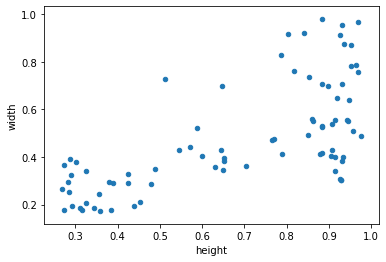

In [60]:
points.plot(x='height', y='width', kind='scatter')

In [63]:
from sklearn import cluster

In [78]:
model = cluster.KMeans(n_clusters=2)

In [79]:
model.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
labels = model.predict(points)

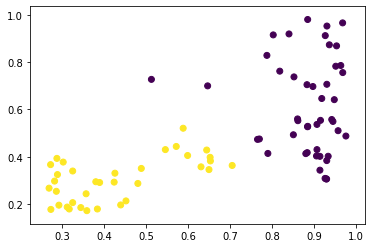

In [87]:
plt.scatter(x=points['height'], y=points['width'], c=labels)

In [88]:
model.cluster_centers_

array([[0.61311194, 0.88416704],
       [0.30454959, 0.42808716]])

In [89]:
labels

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [90]:
annotations['cluster_id'] = labels

In [91]:
annotations

,filename,img_width,img_height,class_name,x,y,width,height,cluster_id
0,_104191893_kukurtihar_papputhedog_-pappu_the_p...,1024,576,Dog,0.210938,0.022569,0.783203,0.951389,0
1,_108037672_p07hv9s1.jpg,1024,576,Dog,0.335938,0.015625,0.641602,0.947917,0
3,01-stray-dogs-nationalgeographic_1927666.jpg,2048,1365,Dog,0.275391,0.288645,0.428223,0.643956,1
4,2-dog.jpg,1920,1440,Dog,0.122396,0.050694,0.873958,0.936111,0
5,7A1AA7B6-1E54-4974-96488CF81302DC7C_source.jpg,2454,2004,Dog,0.118174,0.003493,0.756316,0.968064,0
6,010-pomeranian_1024.jpg,1024,415,Dog,0.172852,0.038554,0.646484,0.918072,0
7,17DOGS-superJumbo.jpg,2048,1365,Dog,0.014648,0.010256,0.966797,0.967766,0
8,280px-Golden_Retrievers_dark_and_light.jpg,280,234,Dog,0.046429,0.064103,0.492857,0.850427,0
9,280px-Golden_Retrievers_dark_and_light.jpg,280,234,Dog,0.439286,0.000000,0.528571,0.884615,0
10,300px-Dog_morphological_variation.png,300,231,Dog,0.043333,0.051948,0.430000,0.545455,1
